This tutorial notebook shows how to fit a global epistasis model to massively parallel assay data. 

In [11]:
# necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import mavenn
from mavenn.src.utils import get_example_dataset

Load data using mavenn's helper method. 

In [2]:
X, y = get_example_dataset(name='MPSA')

In [3]:
# X is an array of 9-nt sequences
X[0:10]

array(['AAAGCAAAA', 'AAAGCAAAC', 'AAAGCAAAG', 'AAAGCAAAU', 'AAAGCAACA',
       'AAAGCAACC', 'AAAGCAACG', 'AAAGCAACU', 'AAAGCAAGA', 'AAAGCAAGC'],
      dtype=object)

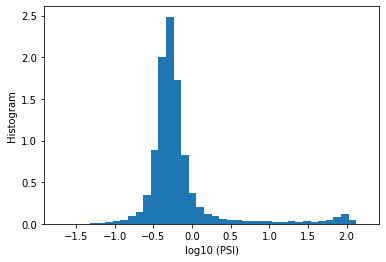

In [4]:
# y = log_10(PSI)
plt.hist(y,bins=40,density=True)
plt.xlabel('log10 (PSI)')
plt.ylabel('Histogram')
plt.show()

In [5]:
# Split data into training and test sets using sklearn
x_train, x_test, y_train, y_test = train_test_split(X, y)

## Fit GE model to data

In [6]:
GER = mavenn.Model(regression_type='GE',
                   X=x_train, 
                   y=y_train, 
                   model_type='additive',
                   learning_rate=0.005,
                   monotonic=True,
                   alphabet_dict='rna')

GER.fit(epochs=200, use_early_stopping=True, early_stopping_patience=20, verbose=1)

One-hot encoding...
Train on 18717 samples, validate on 4680 samples
Epoch 1/200
18717/18717 [==============================] - 1s 41us/step - loss: 0.3210 - mean_absolute_error: 0.3453 - val_loss: 0.1935 - val_mean_absolute_error: 0.2640
Epoch 2/200
18717/18717 [==============================] - 1s 28us/step - loss: 0.1117 - mean_absolute_error: 0.2083 - val_loss: 0.0884 - val_mean_absolute_error: 0.1823
Epoch 3/200
18717/18717 [==============================] - 1s 29us/step - loss: 0.0933 - mean_absolute_error: 0.1861 - val_loss: 0.0869 - val_mean_absolute_error: 0.1786
Epoch 4/200
18717/18717 [==============================] - 1s 28us/step - loss: 0.0927 - mean_absolute_error: 0.1854 - val_loss: 0.0891 - val_mean_absolute_error: 0.1797
Epoch 5/200
18717/18717 [==============================] - 1s 28us/step - loss: 0.0924 - mean_absolute_error: 0.1847 - val_loss: 0.0942 - val_mean_absolute_error: 0.1822
Epoch 6/200
18717/18717 [==============================] - 1s 29us/step - loss: 0

## Plot results

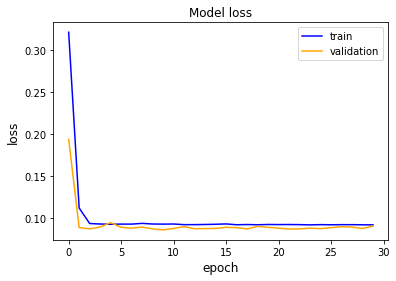

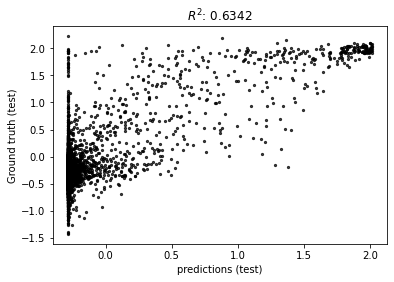

In [7]:
loss_history =  GER.model.return_loss()
predictions = GER.model.predict(x_test)

plt.plot(loss_history.history['loss'], color='blue')
plt.plot(loss_history.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])
plt.show()

Rsquared = str(np.corrcoef(predictions.ravel(),y_test)[0][1]**2)
plt.scatter(predictions,y_test,s=5, alpha=0.75, color='black')
plt.ylabel('Ground truth (test)')
plt.xlabel('predictions (test)')
plt.title('$R^2$: '+Rsquared[0:6])
plt.show()

## Plot the global epistasis non linearity 

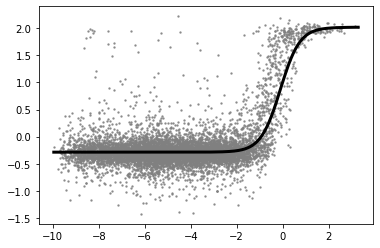

In [8]:
GE_nonlinearity, phi_range, latent_trait = GER.ge_nonlinearity(x_test)
plt.plot(phi_range,GE_nonlinearity,color='black',lw=3)
plt.scatter(latent_trait,y_test,color='gray',s=2,alpha=0.75)
plt.show()

## Fit pairwise GE model to the same data

To fit a pairwise GE model to these MPSA data, we change the model_type to 'pairwise'. We also reduce a learning rate by a small amount

In [9]:
GER_pairwise = mavenn.Model(regression_type='GE',
                   X=x_train, 
                   y=y_train, 
                   model_type='pairwise',
                   learning_rate=0.001,
                   monotonic=True,
                   alphabet_dict='rna')

GER_pairwise.fit(epochs=200, use_early_stopping=True, early_stopping_patience=20, verbose=1)

One-hot encoding...
Train on 18717 samples, validate on 4680 samples
Epoch 1/200
18717/18717 [==============================] - 1s 47us/step - loss: 0.8630 - mean_absolute_error: 0.7010 - val_loss: 0.2391 - val_mean_absolute_error: 0.3194
Epoch 2/200
18717/18717 [==============================] - 1s 43us/step - loss: 0.2141 - mean_absolute_error: 0.2923 - val_loss: 0.1741 - val_mean_absolute_error: 0.2655
Epoch 3/200
18717/18717 [==============================] - 1s 34us/step - loss: 0.1307 - mean_absolute_error: 0.2375 - val_loss: 0.0966 - val_mean_absolute_error: 0.2040
Epoch 4/200
18717/18717 [==============================] - 1s 33us/step - loss: 0.0895 - mean_absolute_error: 0.1945 - val_loss: 0.0794 - val_mean_absolute_error: 0.1829
Epoch 5/200
18717/18717 [==============================] - 1s 40us/step - loss: 0.0780 - mean_absolute_error: 0.1800 - val_loss: 0.0721 - val_mean_absolute_error: 0.1734
Epoch 6/200
18717/18717 [==============================] - 1s 32us/step - loss: 0

18717/18717 [==============================] - 1s 33us/step - loss: 0.0618 - mean_absolute_error: 0.1540 - val_loss: 0.0583 - val_mean_absolute_error: 0.1528
Epoch 49/200
18717/18717 [==============================] - 1s 34us/step - loss: 0.0618 - mean_absolute_error: 0.1542 - val_loss: 0.0583 - val_mean_absolute_error: 0.1525
Epoch 50/200
18717/18717 [==============================] - 1s 33us/step - loss: 0.0617 - mean_absolute_error: 0.1543 - val_loss: 0.0579 - val_mean_absolute_error: 0.1521
Epoch 51/200
18717/18717 [==============================] - 1s 33us/step - loss: 0.0610 - mean_absolute_error: 0.1543 - val_loss: 0.0561 - val_mean_absolute_error: 0.1526
Epoch 52/200
18717/18717 [==============================] - 1s 33us/step - loss: 0.0584 - mean_absolute_error: 0.1535 - val_loss: 0.0542 - val_mean_absolute_error: 0.1511
Epoch 53/200
18717/18717 [==============================] - 1s 32us/step - loss: 0.0569 - mean_absolute_error: 0.1529 - val_loss: 0.0537 - val_mean_absolute_e

Epoch 96/200
18717/18717 [==============================] - 1s 33us/step - loss: 0.0498 - mean_absolute_error: 0.1490 - val_loss: 0.0492 - val_mean_absolute_error: 0.1495
Epoch 97/200
18717/18717 [==============================] - 1s 33us/step - loss: 0.0498 - mean_absolute_error: 0.1489 - val_loss: 0.0484 - val_mean_absolute_error: 0.1483
Epoch 98/200
18717/18717 [==============================] - 1s 33us/step - loss: 0.0498 - mean_absolute_error: 0.1489 - val_loss: 0.0485 - val_mean_absolute_error: 0.1483
Epoch 99/200
18717/18717 [==============================] - 1s 36us/step - loss: 0.0499 - mean_absolute_error: 0.1490 - val_loss: 0.0484 - val_mean_absolute_error: 0.1485
Epoch 100/200
18717/18717 [==============================] - 1s 41us/step - loss: 0.0498 - mean_absolute_error: 0.1491 - val_loss: 0.0484 - val_mean_absolute_error: 0.1482
Epoch 101/200
18717/18717 [==============================] - 1s 36us/step - loss: 0.0499 - mean_absolute_error: 0.1490 - val_loss: 0.0490 - val_

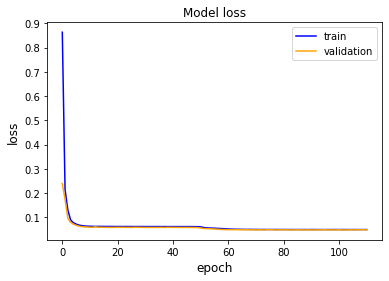

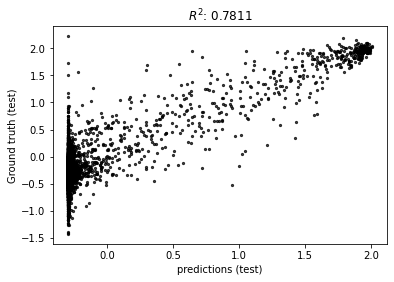

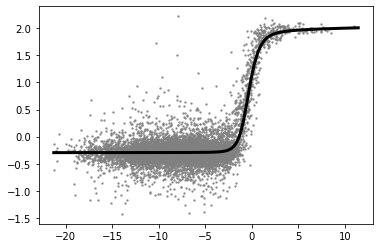

In [10]:
loss_history =  GER_pairwise.model.return_loss()
predictions = GER_pairwise.model.predict(x_test)

plt.plot(loss_history.history['loss'], color='blue')
plt.plot(loss_history.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])
plt.show()

Rsquared = str(np.corrcoef(predictions.ravel(),y_test)[0][1]**2)
plt.scatter(predictions,y_test,s=5, alpha=0.75, color='black')
plt.ylabel('Ground truth (test)')
plt.xlabel('predictions (test)')
plt.title('$R^2$: '+Rsquared[0:6])
plt.show()

GE_nonlinearity, phi_range, latent_trait = GER_pairwise.ge_nonlinearity(x_test)
plt.plot(phi_range,GE_nonlinearity,color='black',lw=3)
plt.scatter(latent_trait,y_test,color='gray',s=2,alpha=0.75)
plt.show()